# #3: Experiment with Other CSV Data

Read the US population data from a CSV file, calculate the growth in population
in consecutive years and compute various statistical measures.
Also creates two graphs - one showing the total population over the years and other
showing the change between consecutive years.

In [1]:
'''
finding mean (average) 
'''
mean = lambda l: sum(l) / len(l)

In [2]:
'''
To find the median, we sort the numbers in ascending order. 
If the length of the list of numbers is odd, 
the number in the middle of the list is the median. 
If the length of the list of numbers is even, 
we get the median by taking the mean of the two middle numbers.
'''
def median(data):
    """Find the median (average) from list of numbers."""
    
    numbers = sorted(data)
    length = len(numbers)
    mid = length // 2
    return (numbers[mid] 
            if length % 2 == 1 
            else mean(numbers[mid - 1 : mid + 1]))

In [3]:
'''
The variance measures how far each number in the set is from the mean. 
Variance is calculated by taking the differences between each number
in the set and the mean, squaring the differences 
(to make them positive) and dividing the sum of the squares 
by the number of values in the set.
'''
def variance(numbers):
    """Find the variance of a list of numbers."""
    
    # find the mean
    avg = mean(numbers)
    # find the difference of each number from the mean
    squared_diff = ((n - avg)**2 for n in numbers)
    return sum(squared_diff)/len(numbers)

In [4]:
import csv

def get_data_from_csv(filename):
    """Reads year and population from CSV file."""
    
    data = []

    with open(filename) as f:
        reader = csv.reader(f)
        next(reader)        
        for row in reader:
            # extract only year from date
            data.append((int(row[0][0:4]), int(float(row[1]))))
                        
    # most recent year is a first record
    # so we have to sort and make
    # first record lowest year
    data.sort()
    return data

In [5]:
import matplotlib.pyplot as plt

def plot_population(population, years):
    
    plt.plot(years, population)
    plt.xlabel('year')
    plt.ylabel('population')
    plt.title('Total population in US')

In [6]:
import matplotlib.pyplot as plt

def plot_population_diff(growth, years):
    
    plt.plot(years, growth)
    plt.xlabel('year')
    plt.ylabel('population growth')
    plt.title('Population Growth in consecutive years')

In [7]:
def calculate_stats(populations):
    """Calculate mean, median, variance and standard deviation of the difference
    in population over the years."""
    
    # find the growth in population in consecutive years
    growth = []
    for i in range(0, len(populations) - 1):
        growth.append(populations[i + 1] - populations[i])
    
    return growth    

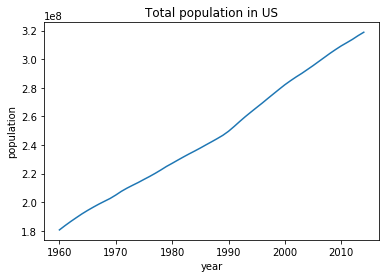

In [8]:
if __name__ == '__main__':
    data = get_data_from_csv('USA_SP_POP_TOTL.csv')
    years = [d[0] for d in data]
    populations = [d[1] for d in data]
    plot_population(populations, years)
    plt.show()

In [9]:
growth = calculate_stats(populations)
print(f'Mean growth: {mean(growth):,.2f}')
print(f'Median growth: {median(growth):,.2f}')
print(f'Varience growth: {variance(growth):,.2f}')
print(f'Stdv growth: {variance(growth)**0.5:,.2f}')

NameError: name 'population' is not defined

In [ ]:
plot_population_diff(growth, years[1:])
plt.show()